# Tarea 1: El modelo de regresión lineal múltiple en Python

##### Se cargar la base de datos "datos_icfes" en el cuaderno Jupiter

In [2]:
# Importar archivo SB11_20231.TXT',  
import pandas as pd
datos_icfes = pd.read_csv(
    r'c:\Users\karen\OneDrive\Escritorio\SEMESTRE 24-2\MODELADO MATEMATICO\SB11_20231.TXT', 
    delimiter='¬', 
    engine='python'
)
datos_icfes.head(6)

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                 TI          COLOMBIA           F           04/11/2005   
1                 TI          COLOMBIA           M           08/04/2007   
2                 TI          COLOMBIA           F           26/05/2006   
3                 CC          COLOMBIA           F           24/05/2004   
4                 TI          COLOMBIA           F           04/05/2005   
5                 TI          COLOMBIA           M           03/06/2005   

   PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0    20231  SB11202310019049      ESTUDIANTE         COLOMBIA   
1    20231  SB11202310017318      ESTUDIANTE         COLOMBIA   
2    20231  SB11202310030916      ESTUDIANTE         COLOMBIA   
3    20231  SB11202310074169      ESTUDIANTE         COLOMBIA   
4    20231  SB11202310044933      ESTUDIANTE         COLOMBIA   
5    20231  SB11202310029637      ESTUDIANTE         COLOMBIA   

  ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_DEPTO  ... PUNT_INGLES  PERCENTIL_INGLES  \
0      CUNDINAMARCA                     25  ...        87.0              94.0   
1             VALLE                     76  ...         NaN               NaN   
2             VALLE                     76  ...         NaN               NaN   
3             VALLE                     76  ...        58.0              43.0   
4             VALLE                     76  ...        69.0              57.0   
5        LA GUAJIRA                     44  ...        45.0              19.0   

  DESEMP_INGLES PUNT_GLOBAL PERCENTIL_GLOBAL ESTU_INSE_INDIVIDUAL  \
0            B+         422            100.0            67.532814   
1           NaN         326              NaN            47.223972   
2           NaN         186              NaN            67.695519   
3            A2         200             12.0            41.863163   
4            B1         263             39.0            51.223795   
5            A-         271             43.0            57.690401   

  ESTU_NSE_INDIVIDUAL ESTU_NSE_ESTABLECIMIENTO PERCENTIL_ESPECIAL_GLOBAL  \
0                 4.0                        4                     100.0   
1                 2.0                        3                     100.0   
2                 4.0                        3                      40.0   
3                 2.0                        3                      58.0   
4                 3.0                        3                      92.0   
5                 3.0                        3                      93.0   

  ESTU_ESTADOINVESTIGACION  
0                 PUBLICAR  
1                 PUBLICAR  
2                 PUBLICAR  
3                 PUBLICAR  
4                 PUBLICAR  
5                 PUBLICAR  

[6 rows x 83 columns]

In [22]:
datos_icfes

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                     TI          COLOMBIA           F           04/11/2005   
1                     TI          COLOMBIA           M           08/04/2007   
2                     TI          COLOMBIA           F           26/05/2006   
3                     CC          COLOMBIA           F           24/05/2004   
4                     TI          COLOMBIA           F           04/05/2005   
...                  ...               ...         ...                  ...   
12699                 TI          COLOMBIA           F           11/05/2005   
12700                 TI          COLOMBIA           M           06/05/2006   
12701                 TI          COLOMBIA           F           23/09/2004   
12702                 TI          COLOMBIA           M           11/09/2006   
12703                 TI          COLOMBIA           M           23/01/2006   

       PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0        20231  SB11202310019049      ESTUDIANTE         COLOMBIA   
1        20231  SB11202310017318      ESTUDIANTE         COLOMBIA   
2        20231  SB11202310030916      ESTUDIANTE         COLOMBIA   
3        20231  SB11202310074169      ESTUDIANTE         COLOMBIA   
4        20231  SB11202310044933      ESTUDIANTE         COLOMBIA   
...        ...               ...             ...              ...   
12699    20231  SB11202310000950      ESTUDIANTE         COLOMBIA   
12700    20231  SB11202310001005      ESTUDIANTE         COLOMBIA   
12701    20231  SB11202310000991      ESTUDIANTE         COLOMBIA   
12702    20231  SB11202310000969      ESTUDIANTE         COLOMBIA   
12703    20231  SB11202310000989      ESTUDIANTE         COLOMBIA   

      ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_DEPTO  ... PUNT_INGLES  \
0          CUNDINAMARCA                     25  ...        87.0   
1                 VALLE                     76  ...         NaN   
2                 VALLE                     76  ...         NaN   
3                 VALLE                     76  ...        58.0   
4                 VALLE                     76  ...        69.0   
...                 ...                    ...  ...         ...   
12699             VALLE                     76  ...        57.0   
12700             VALLE                     76  ...        77.0   
12701             VALLE                     76  ...        75.0   
12702             VALLE                     76  ...        82.0   
12703             VALLE                     76  ...        70.0   

       PERCENTIL_INGLES DESEMP_INGLES PUNT_GLOBAL PERCENTIL_GLOBAL  \
0                  94.0            B+         422            100.0   
1                   NaN           NaN         326              NaN   
2                   NaN           NaN         186              NaN   
3                  43.0            A2         200             12.0   
4                  57.0            B1         263             39.0   
...                 ...           ...         ...              ...   
12699              42.0            A1         305             59.0   
12700              70.0            B1         331             73.0   
12701              65.0            B1         312             62.0   
12702              82.0            B+         337             77.0   
12703              57.0            B1         329             72.0   

      ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL ESTU_NSE_ESTABLECIMIENTO  \
0                67.532814                 4.0                        4   
1                47.223972                 2.0                        3   
2                67.695519                 4.0                        3   
3                41.863163                 2.0                        3   
4                51.223795                 3.0                        3   
...                    ...                 ...                      ...   
12699            60.907910                 3.0           

In [14]:
datos_icfes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12704 entries, 0 to 12703
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             12704 non-null  object 
 1   ESTU_NACIONALIDAD              12704 non-null  object 
 2   ESTU_GENERO                    12704 non-null  object 
 3   ESTU_FECHANACIMIENTO           12704 non-null  object 
 4   PERIODO                        12704 non-null  int64  
 5   ESTU_CONSECUTIVO               12704 non-null  object 
 6   ESTU_ESTUDIANTE                12704 non-null  object 
 7   ESTU_PAIS_RESIDE               12704 non-null  object 
 8   ESTU_DEPTO_RESIDE              12704 non-null  object 
 9   ESTU_COD_RESIDE_DEPTO          12704 non-null  int64  
 10  ESTU_MCPIO_RESIDE              12704 non-null  object 
 11  ESTU_COD_RESIDE_MCPIO          12704 non-null  int64  
 12  ESTU_PRESENTACIONSABADO        12702 non-null 

In [15]:
datos_icfes.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_PRESENTACIONSABADO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_

### Eliminación de valores faltantes

In [3]:
icfes_sin_nan = datos_icfes[
(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &  
(~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &  
(~datos_icfes['PUNT_MATEMATICAS'].isna()) &  
(~datos_icfes['PUNT_C_NATURALES'].isna()) &  
(~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &  
(~datos_icfes['PUNT_INGLES'].isna()) &
(~datos_icfes['PUNT_GLOBAL'].isna()) 
]
icfes_sin_nan.head(12)

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                  TI          COLOMBIA           F           04/11/2005   
3                  CC          COLOMBIA           F           24/05/2004   
4                  TI          COLOMBIA           F           04/05/2005   
5                  TI          COLOMBIA           M           03/06/2005   
6                  TI          COLOMBIA           F           23/08/2005   
7                  TI          COLOMBIA           M           31/12/2005   
8                  TI          COLOMBIA           M           17/07/2006   
9                  TI          COLOMBIA           M           14/06/2005   
10                 TI          COLOMBIA           F           11/07/2006   
11                 TI          COLOMBIA           F           06/11/2006   
12                 TI          COLOMBIA           M           20/03/2007   
13                 TI          COLOMBIA           M           16/10/2005   

    PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0     20231  SB11202310019049      ESTUDIANTE         COLOMBIA   
3     20231  SB11202310074169      ESTUDIANTE         COLOMBIA   
4     20231  SB11202310044933      ESTUDIANTE         COLOMBIA   
5     20231  SB11202310029637      ESTUDIANTE         COLOMBIA   
6     20231  SB11202310026848      ESTUDIANTE         COLOMBIA   
7     20231  SB11202310004887      ESTUDIANTE         COLOMBIA   
8     20231  SB11202310018624      ESTUDIANTE         COLOMBIA   
9     20231  SB11202310026476      ESTUDIANTE         COLOMBIA   
10    20231  SB11202310007697      ESTUDIANTE         COLOMBIA   
11    20231  SB11202310011758      ESTUDIANTE         COLOMBIA   
12    20231  SB11202310011296      ESTUDIANTE         COLOMBIA   
13    20231  SB11202310012748      ESTUDIANTE         COLOMBIA   

   ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_DEPTO  ... PUNT_INGLES  \
0       CUNDINAMARCA                     25  ...        87.0   
3              VALLE                     76  ...        58.0   
4              VALLE                     76  ...        69.0   
5         LA GUAJIRA                     44  ...        45.0   
6              VALLE                     76  ...        50.0   
7              VALLE                     76  ...        52.0   
8              CAUCA                     19  ...        73.0   
9              VALLE                     76  ...        63.0   
10             VALLE                     76  ...        74.0   
11            NARIÑO                     52  ...        63.0   
12            NARIÑO                     52  ...        75.0   
13            NARIÑO                     52  ...        65.0   

    PERCENTIL_INGLES DESEMP_INGLES PUNT_GLOBAL PERCENTIL_GLOBAL  \
0               94.0            B+         422            100.0   
3               43.0            A2         200             12.0   
4               57.0            B1         263             39.0   
5               19.0            A-         271             43.0   
6               29.0            A1         295             54.0   
7               34.0            A1         320             66.0   
8               62.0            B1         330             72.0   
9               50.0            A2         335             75.0   
10              64.0            B1         362             89.0   
11              50.0            A2         273             44.0   
12              65.0            B1         359             88.0   
13              52.0            A2         333             74.0   

   ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL ESTU_NSE_ESTABLECIMIENTO  \
0             67.532814                 4.0                        4   
3             41.863163                 2.0                        3   
4             51.223795                 3.0                        3   
5             57.690401                 3.0                        3   
6             39.984838                 1.0                        3   
7             50.6

In [8]:
icfes_red=icfes_sin_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS',
             'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES','PUNT_GLOBAL']]
icfes_red

ESTU_INSE_INDIVIDUAL  PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  \
0                 67.532814                   100                83   
3                 41.863163                    45                41   
4                 51.223795                    53                55   
5                 57.690401                    63                38   
6                 39.984838                    69                60   
...                     ...                   ...               ...   
12698             66.644537                    74                76   
12699             60.907910                    69                58   
12700             68.617176                    64                65   
12702             62.356836                    70                70   
12703             60.003899                    69                67   

       PUNT_C_NATURALES  PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  
0                    77                        77         87.0          422  
3                    41                        27         58.0          200  
4                    41                        56         69.0          263  
5                    60                        59         45.0          271  
6                    59                        51         50.0          295  
...                 ...                       ...          ...          ...  
12698                71                        72         87.0          372  
12699                59                        59         57.0          305  
12700                67                        65         77.0          331  
12702                63                        62         82.0          337  
12703                73                        53         70.0          329  

[11853 rows x 7 columns]

### Interpretacion de elininacion de valores faltantes

Se han eliminado los valores faltantes (NaN) utilizando el método .isna(), lo que ha reducido el conjunto de datos de 12,704 filas a 11,853 filas, implicando que 851 filas contenían al menos un valor faltante en las variables consideradas. Este proceso asegura que los datos restantes estén completos, lo que facilita la implementación de algoritmos y la obtención de resultados más consistentes y claros.

No obstante, es importante tener en cuenta el posible sesgo que puede haberse introducido al eliminar estas filas, así como la posible pérdida de representatividad de la muestra original. 

### Creacion de histogramas para reducir valores no representativos

In [ ]:
import matplotlib.pyplot as plt

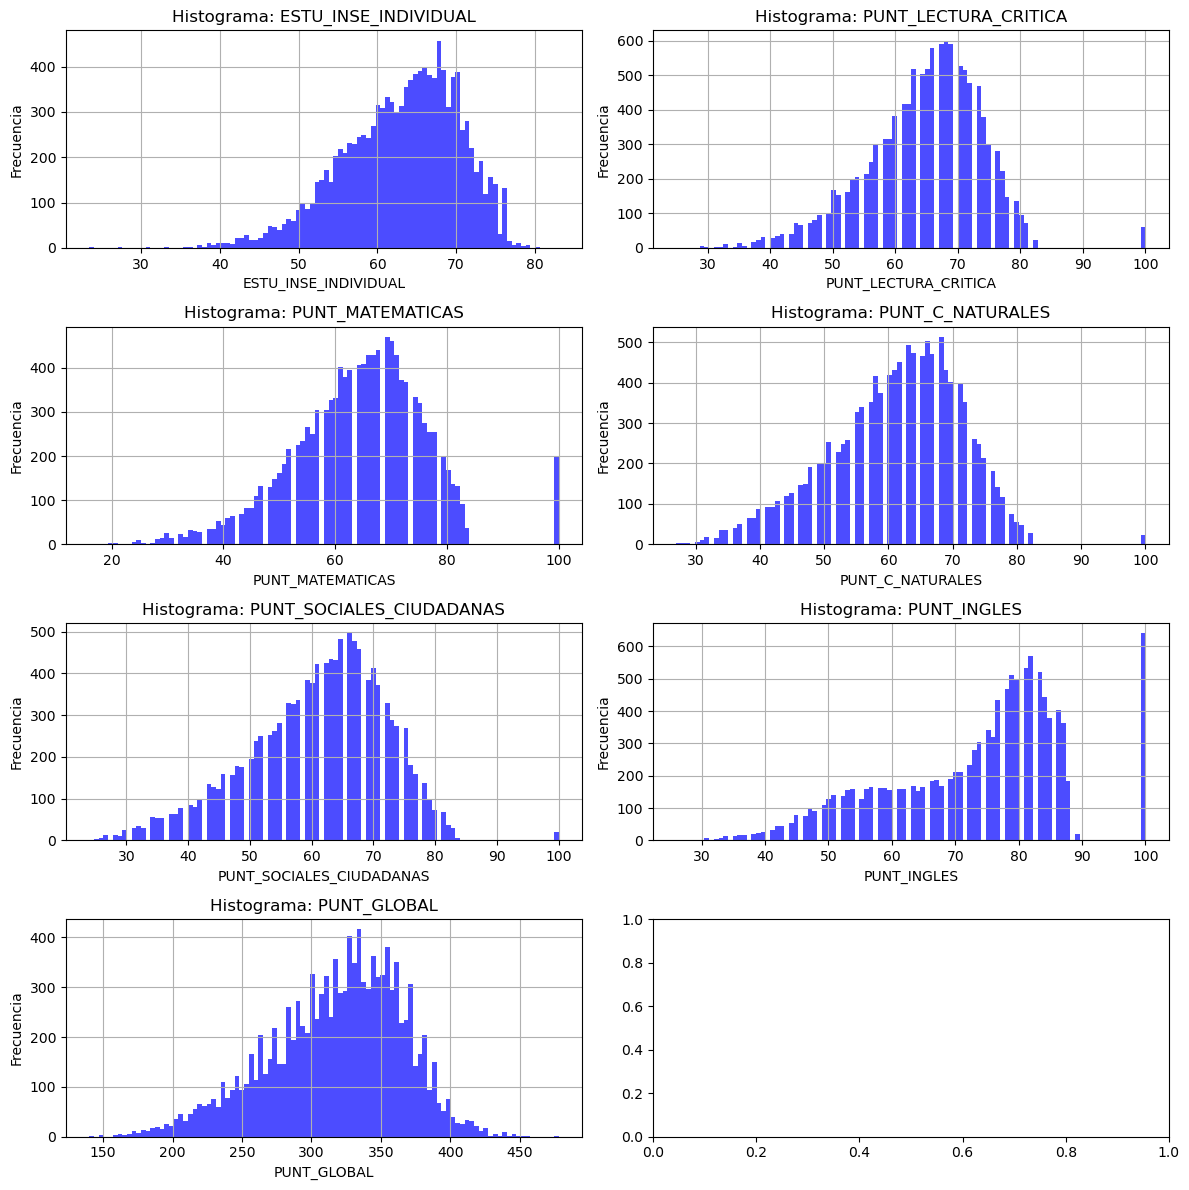

In [42]:
variables = ['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS',
             'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES','PUNT_GLOBAL']

fig, axs = plt.subplots(4, 2, figsize=(12, 12))

def plot_histogram(ax, data, title, xlabel):
    ax.hist(data, bins=100, color='blue', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frecuencia')
    ax.grid(True)

for i, variable in enumerate(variables):
    row = i // 2  
    col = i % 2   
    plot_histogram(axs[row, col], icfes_red[variable], f'Histograma: {variable}', variable)
plt.tight_layout()
plt.show()

#### Codigo de eliminacion de datos no represetantivos 

In [9]:
datos_icfes1 = icfes_red[
    (icfes_red["ESTU_INSE_INDIVIDUAL"] > 40) & (icfes_red["ESTU_INSE_INDIVIDUAL"] < 80) &
    (icfes_red["PUNT_LECTURA_CRITICA"] > 40) & (icfes_red["PUNT_LECTURA_CRITICA"] < 83) &
    (icfes_red["PUNT_MATEMATICAS"] > 30) & (icfes_red["PUNT_MATEMATICAS"] < 85) &
    (icfes_red["PUNT_C_NATURALES"] > 30) & (icfes_red["PUNT_C_NATURALES"] < 83) &
    (icfes_red["PUNT_SOCIALES_CIUDADANAS"] > 30) & (icfes_red["PUNT_SOCIALES_CIUDADANAS"] < 83) &
    (icfes_red["PUNT_INGLES"] > 35) & (icfes_red["PUNT_INGLES"] < 89)&
    (icfes_red["PUNT_GLOBAL"] > 100) & (icfes_red["PUNT_GLOBAL"] < 430)
]
datos_icfes1.head(12)

ESTU_INSE_INDIVIDUAL  PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  \
4              51.223795                    53                55   
5              57.690401                    63                38   
7              50.613232                    57                68   
8              51.019087                    60                70   
9              52.959293                    71                70   
10             56.890296                    71                78   
11             71.737309                    58                61   
12             42.200409                    62                84   
13             74.580643                    63                68   
14             69.897661                    67                74   
15             68.645524                    72                76   
16             63.023490                    68                79   

    PUNT_C_NATURALES  PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  
4                 41                        56         69.0          263  
5                 60                        59         45.0          271  
7                 74                        61         52.0          320  
8                 69                        63         73.0          330  
9                 64                        64         63.0          335  
10                71                        69         74.0          362  
11                54                        43         63.0          273  
12                70                        70         75.0          359  
13                72                        64         65.0          333  
14                70                        70         69.0          351  
15                74                        65         75.0          360  
16                76                        71         77.0          369

## Comparacion de datos de la muestra con los originales 

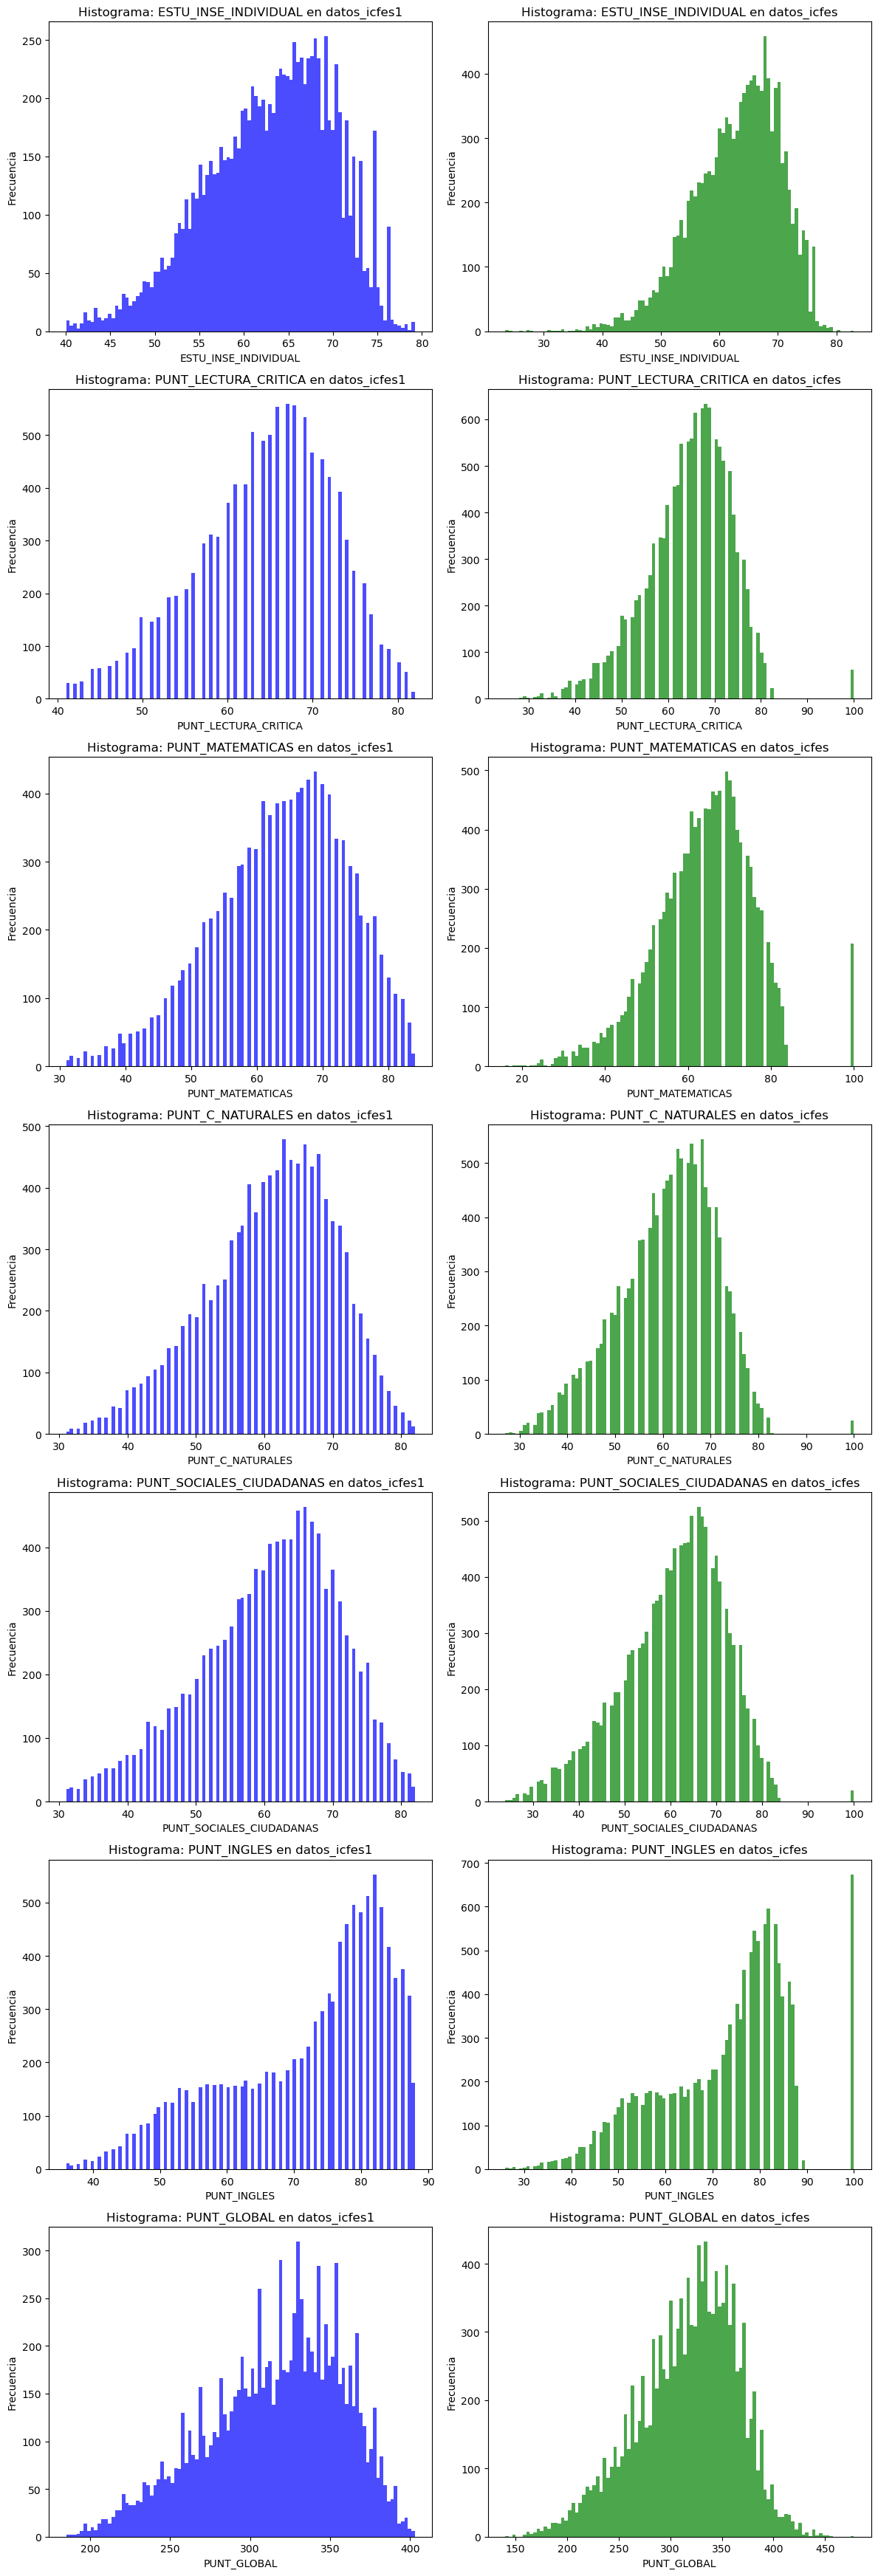

In [46]:
variables = ['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS',
             'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES','PUNT_GLOBAL']

fig, axs = plt.subplots(len(variables), 2, figsize=(12, 5 * len(variables)))

for i, variable in enumerate(variables):
    # Primer histograma - datos_icfes1
    axs[i, 0].hist(datos_icfes1[variable], bins=100, color='blue', alpha=0.7)
    axs[i, 0].set_title(f'Histograma: {variable} en datos_icfes1')
    axs[i, 0].set_xlabel(variable)
    axs[i, 0].set_ylabel('Frecuencia')

    # Segundo histograma - datos_icfes
    axs[i, 1].hist(datos_icfes[variable], bins=100, color='green', alpha=0.7)
    axs[i, 1].set_title(f'Histograma: {variable} en datos_icfes')
    axs[i, 1].set_xlabel(variable)
    axs[i, 1].set_ylabel('Frecuencia')
    
plt.tight_layout()
plt.show()

# Diagramas de dispersion 

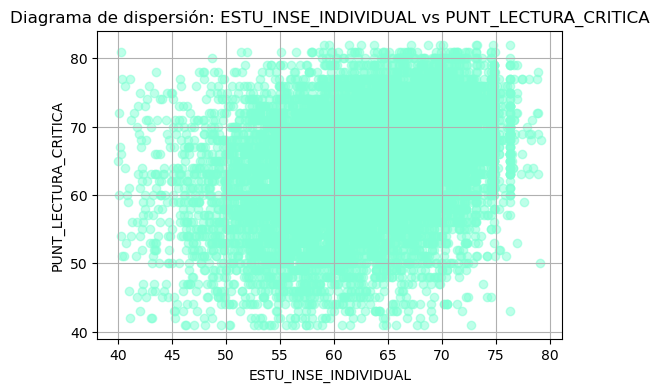

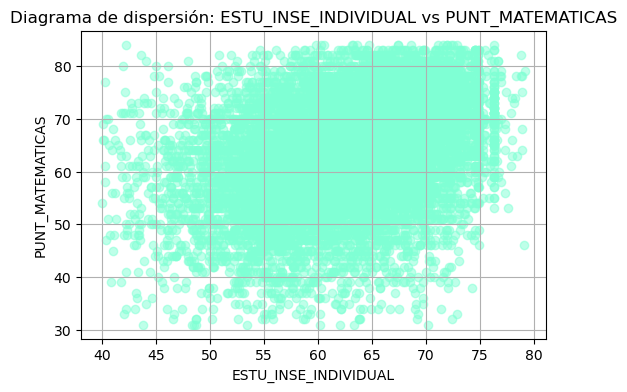

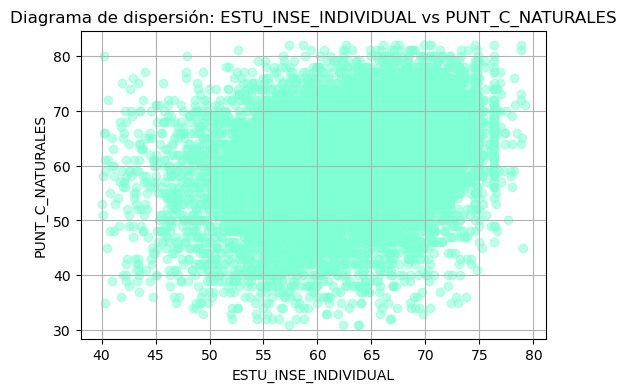

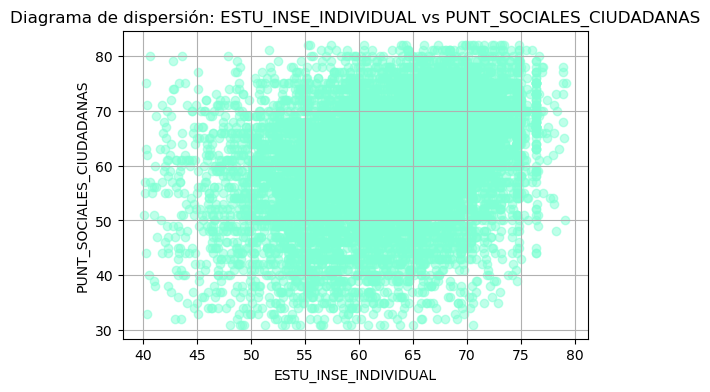

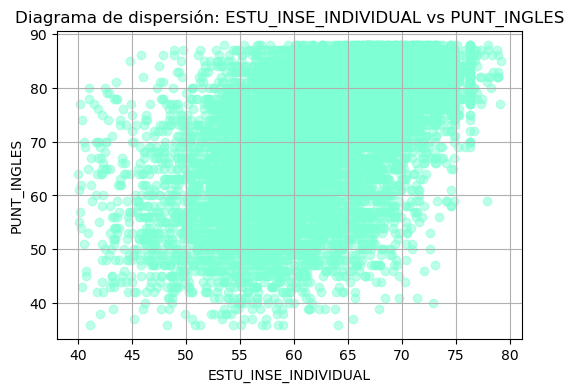

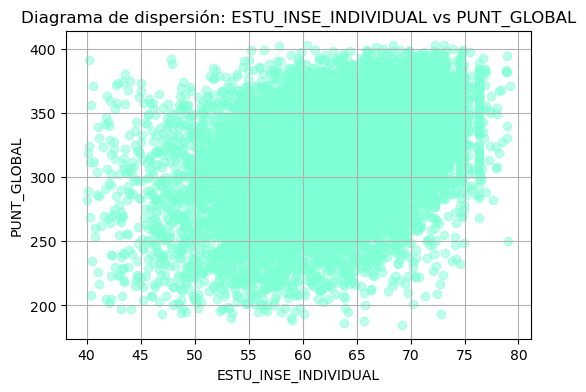

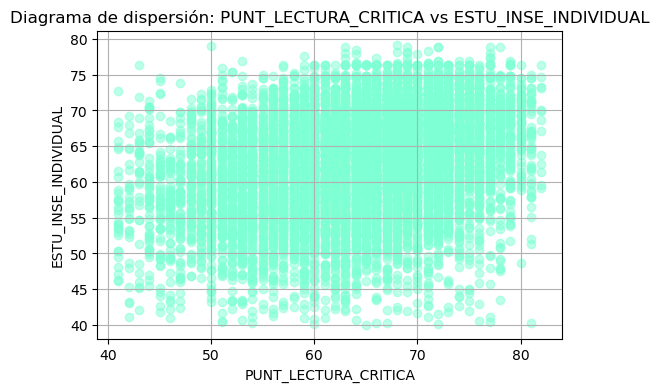

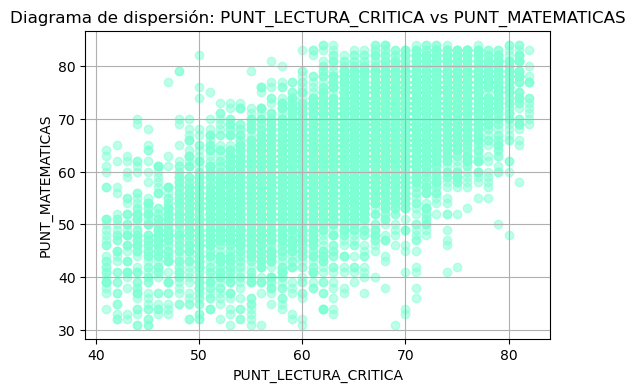

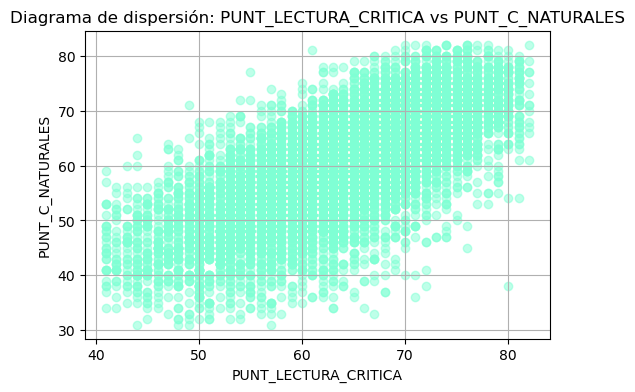

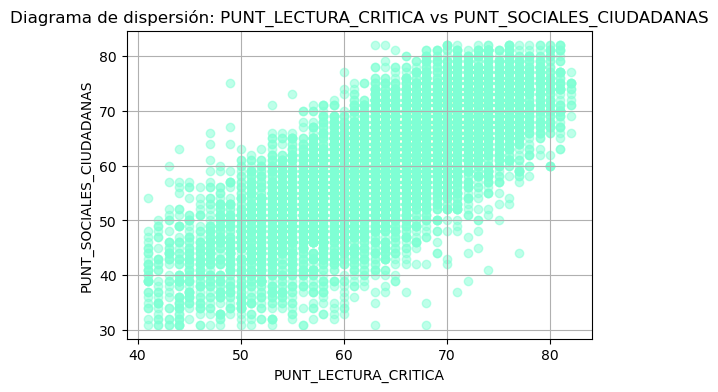

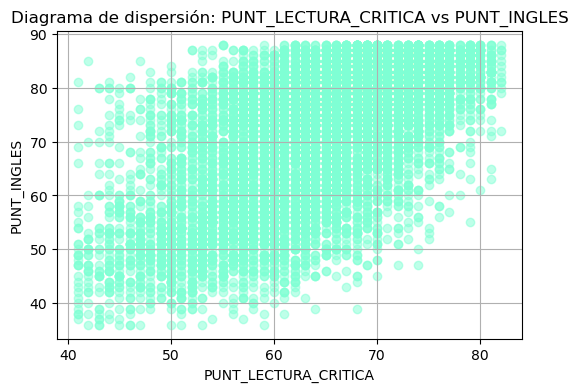

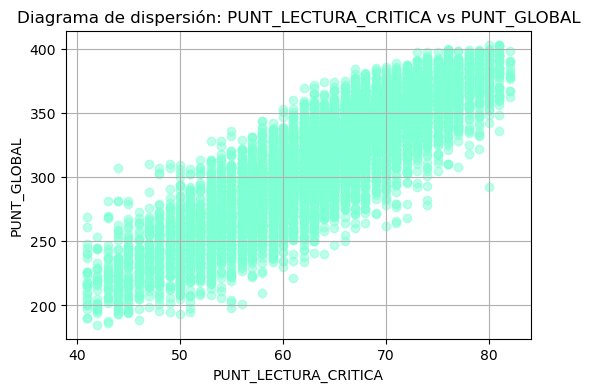

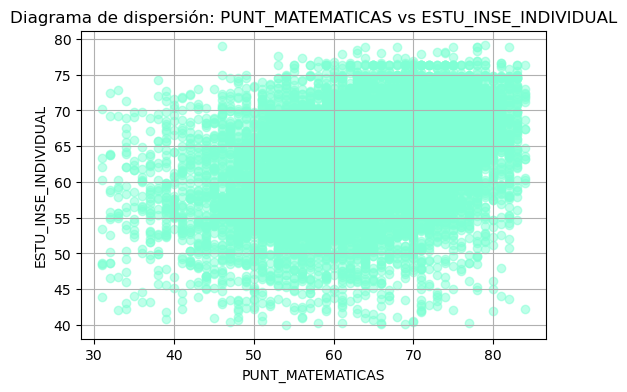

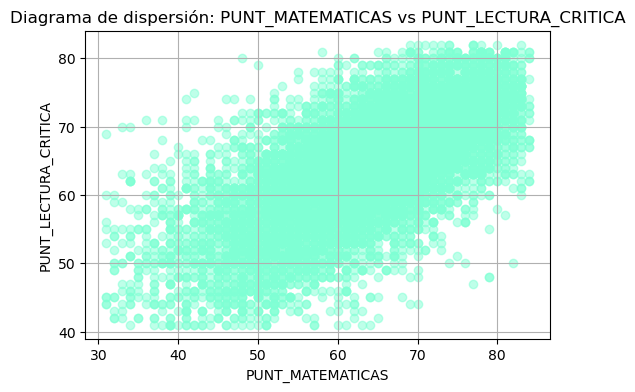

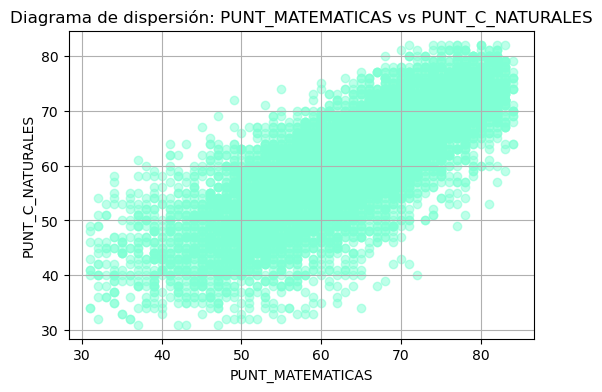

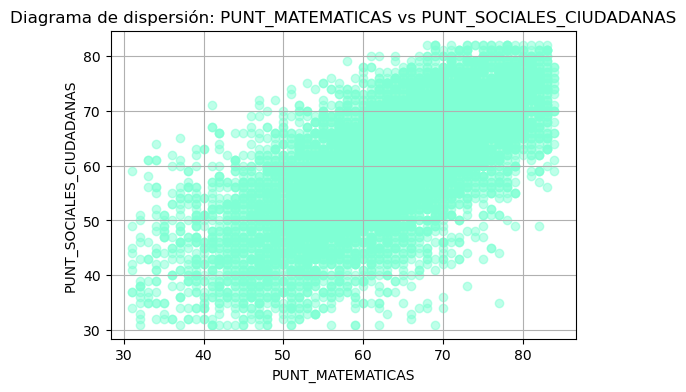

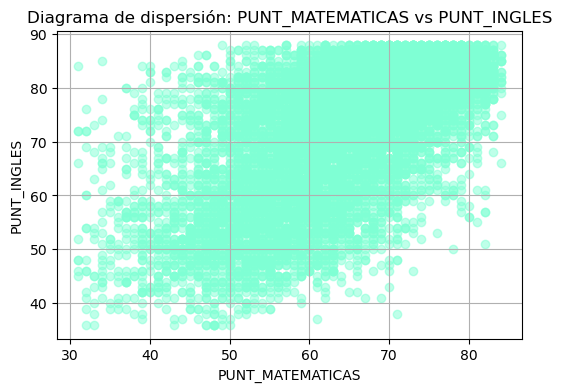

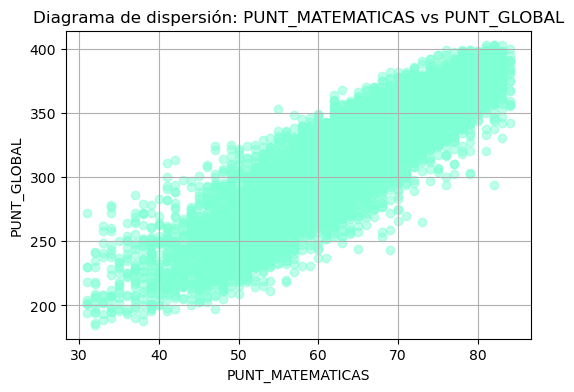

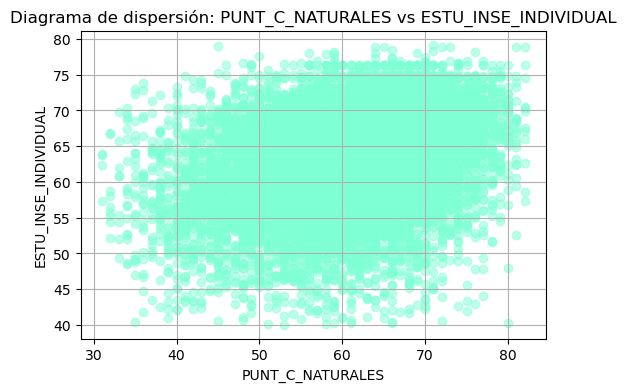

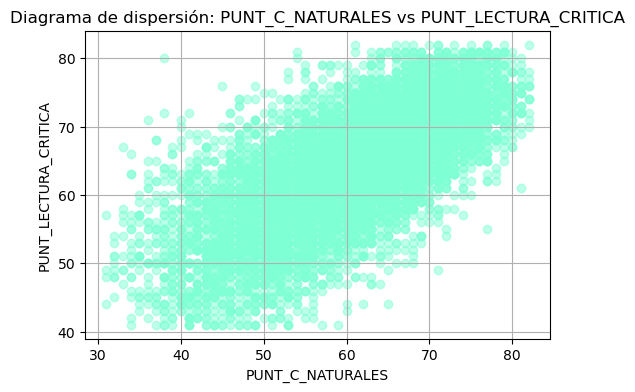

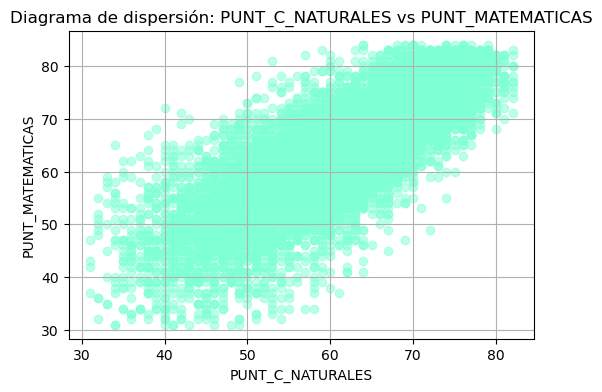

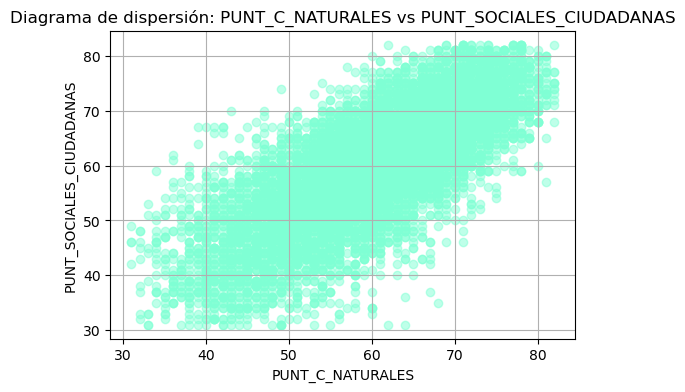

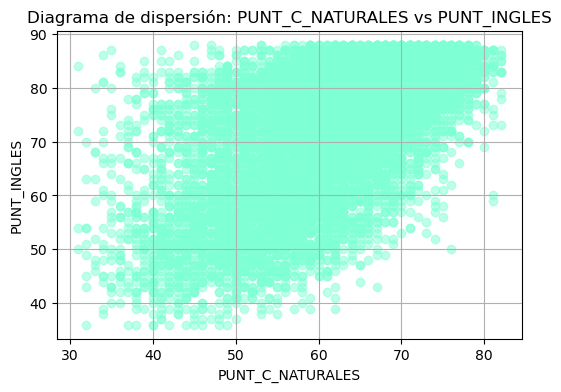

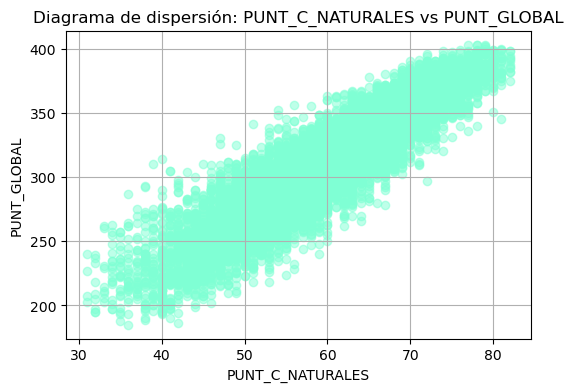

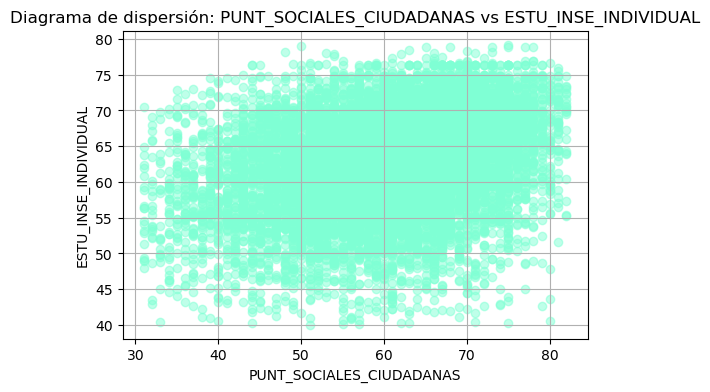

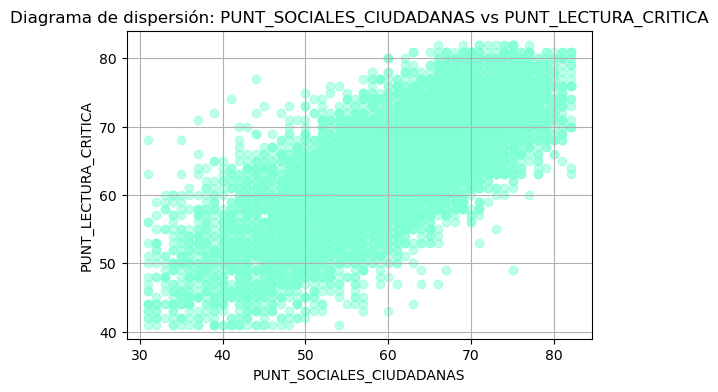

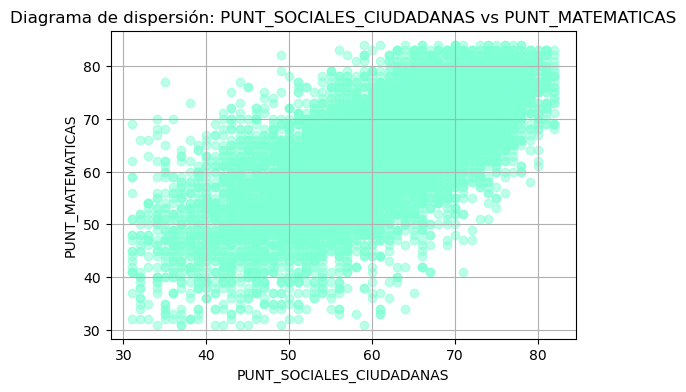

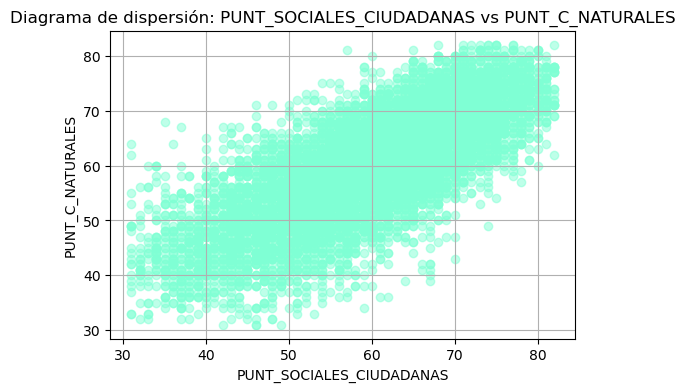

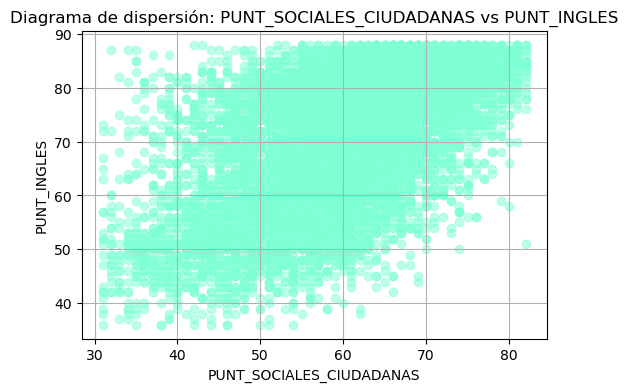

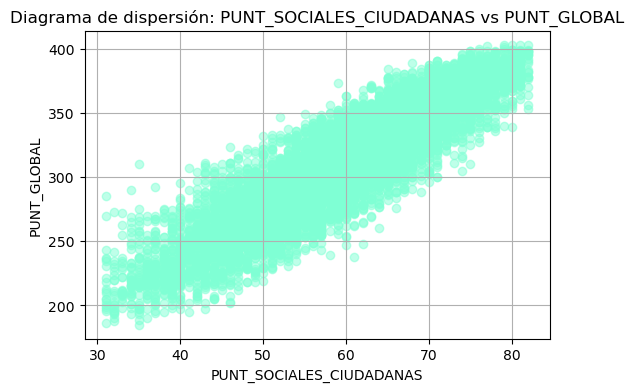

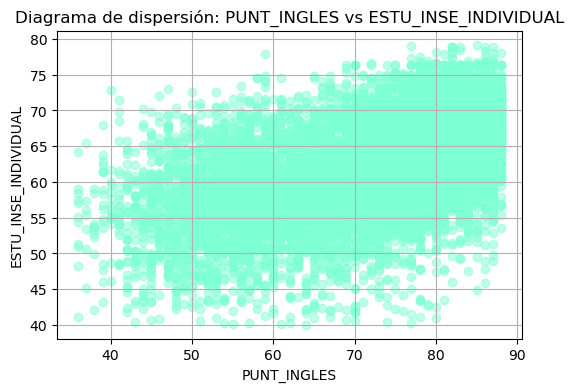

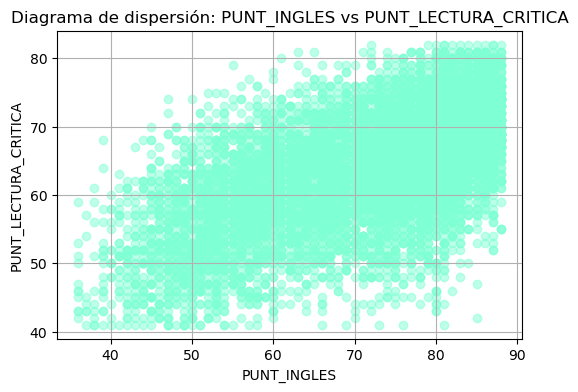

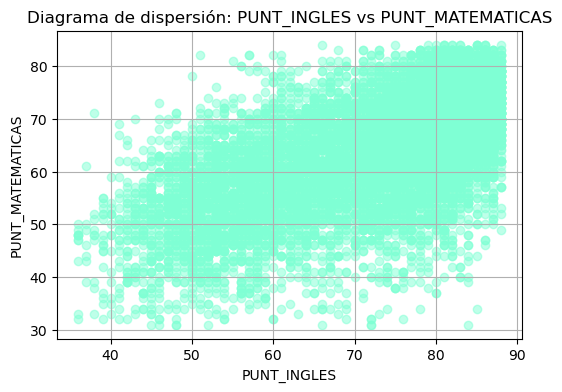

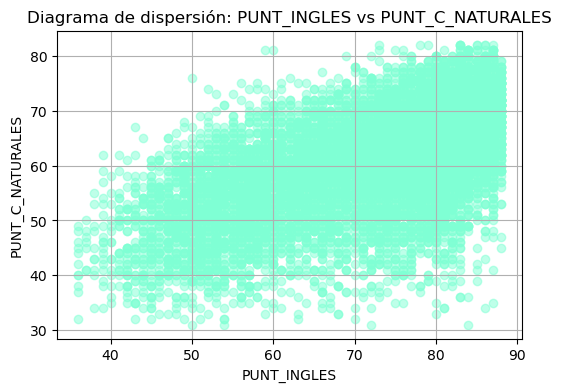

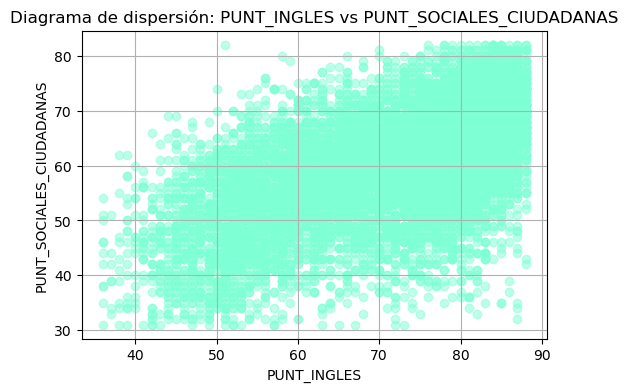

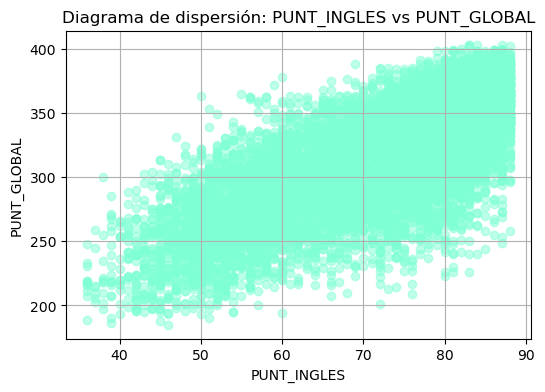

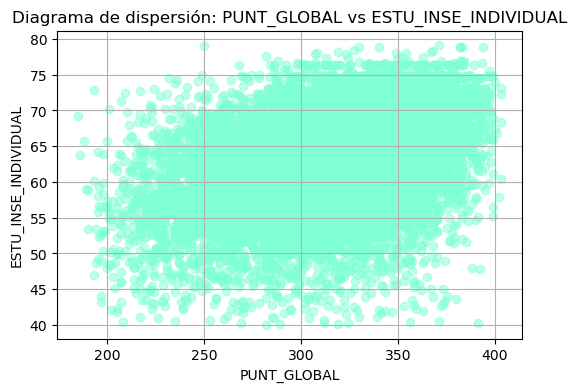

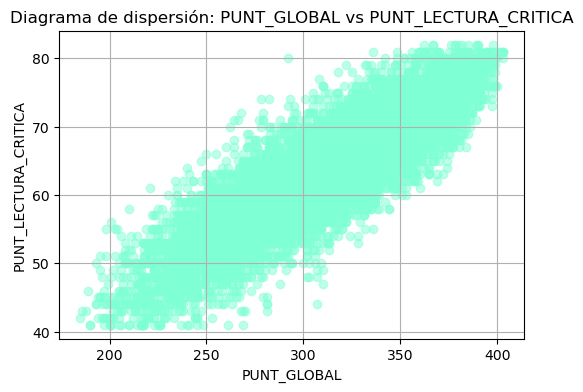

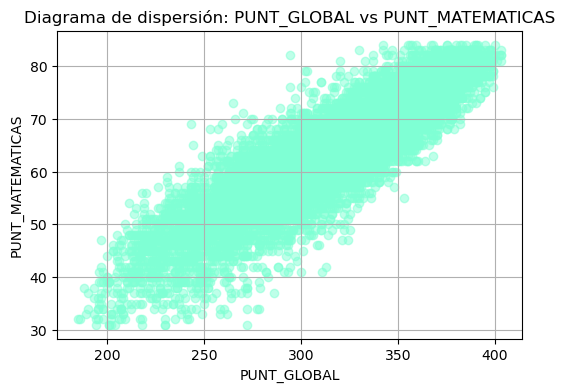

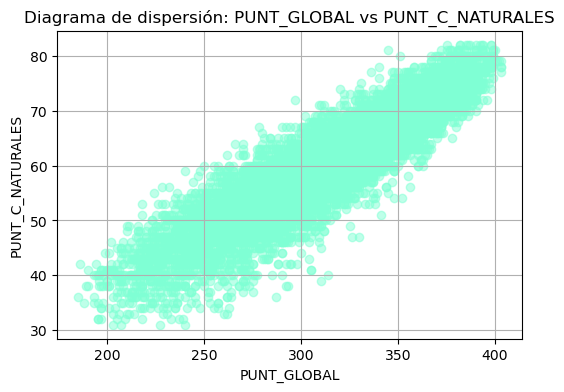

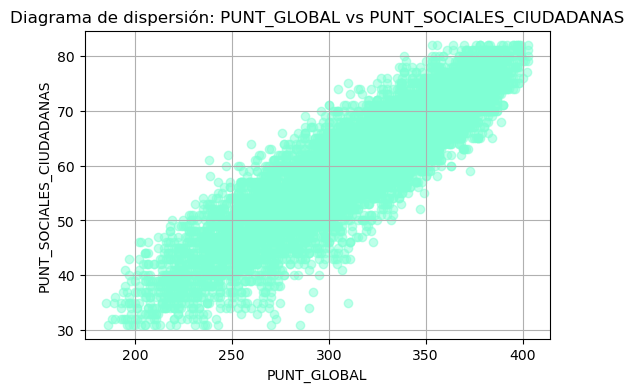

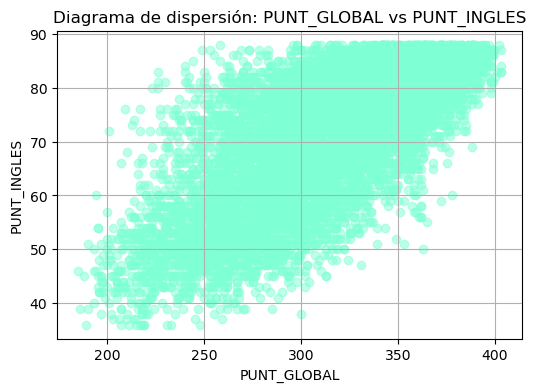

In [80]:
variables_explicativas = ['ESTU_INSE_INDIVIDUAL','PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 
                          'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES','PUNT_GLOBAL']

# Bucle 
for var_x in variables_explicativas:
    for var_y in variables_explicativas:
        if var_x != var_y: 
            plt.figure(figsize=(6, 4))
            plt.scatter(datos_icfes1[var_x], datos_icfes1[var_y], alpha=0.5,color='aquamarine')
            plt.title(f'Diagrama de dispersión: {var_x} vs {var_y}')
            plt.xlabel(var_x)
            plt.ylabel(var_y)
            plt.grid(True)
            plt.show()
# Se repiten graficas 

## Variable respuesta PUNT_GLOBAL

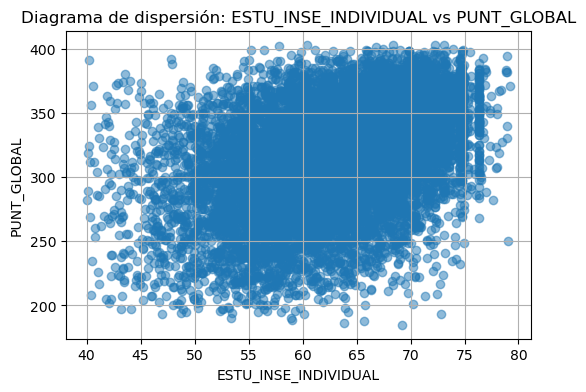

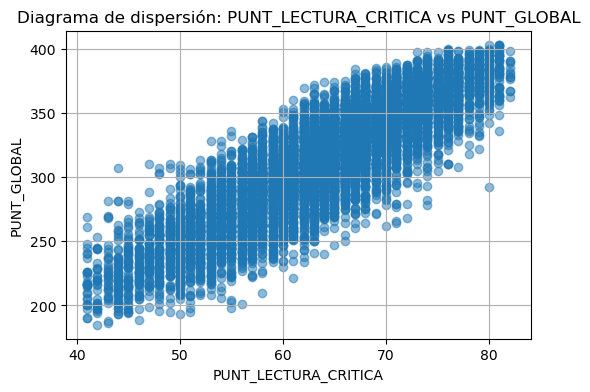

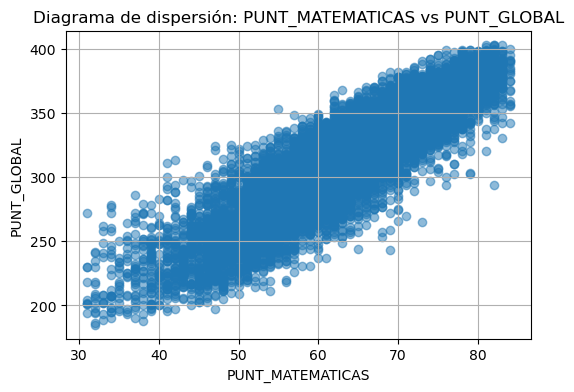

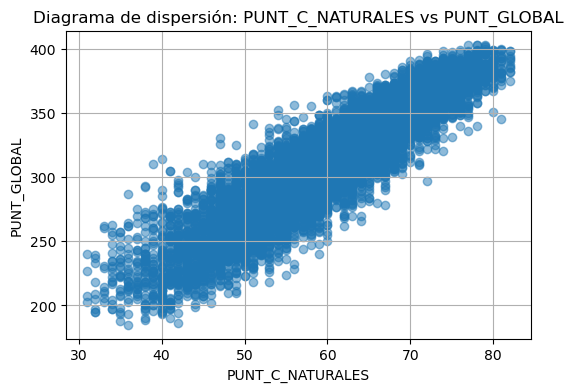

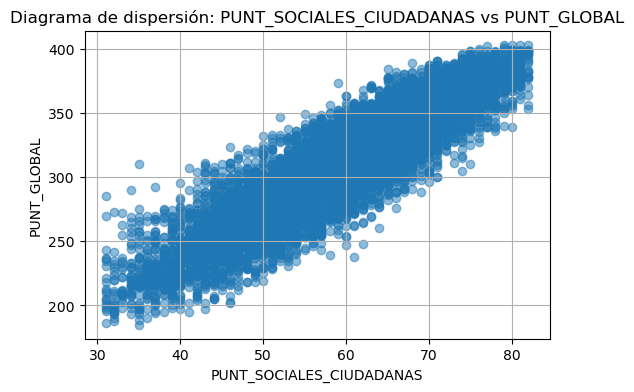

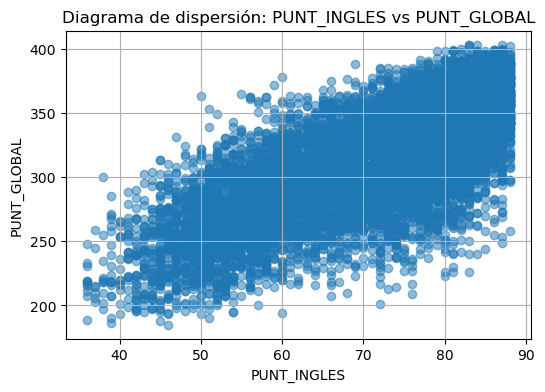

In [64]:
variables_explicativas = ['ESTU_INSE_INDIVIDUAL','PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 
                          'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']

for variable in variables_explicativas:
    plt.figure(figsize=(6, 4))
    plt.scatter(datos_icfes1[variable], datos_icfes1['PUNT_GLOBAL'], alpha=0.5,)
    plt.title(f'Diagrama de dispersión: {variable} vs PUNT_GLOBAL')
    plt.xlabel(variable)
    plt.ylabel('PUNT_GLOBAL')
    plt.grid(True)
    plt.show()

Los diagramas de dispersión del Índice Socioeconómico del evaluado muestran que esta variable explicativa tiene una correlación muy baja o casi insignificante con las demás variables. Sin embargo, se observa que el puntaje de lectura crítica, el puntaje de matemáticas, el puntaje de ciencias naturales, y el puntaje de ciencias sociales y ciudadanas parecen tener una correlación positiva entre sí. De manera similar, los puntajes de matemáticas y ciencias naturales también muestran una correlación positiva significativa.

# Coeficientes de correlacion y correlacion grafica 

In [58]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [51]:
datos_icfes1.corr('pearson')

ESTU_INSE_INDIVIDUAL  PUNT_LECTURA_CRITICA  \
ESTU_INSE_INDIVIDUAL                  1.000000              0.316357   
PUNT_LECTURA_CRITICA                  0.316357              1.000000   
PUNT_MATEMATICAS                      0.346811              0.671409   
PUNT_C_NATURALES                      0.316989              0.708999   
PUNT_SOCIALES_CIUDADANAS              0.315534              0.752876   
PUNT_INGLES                           0.544102              0.609404   
PUNT_GLOBAL                           0.395583              0.867049   

                          PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_INSE_INDIVIDUAL              0.346811          0.316989   
PUNT_LECTURA_CRITICA              0.671409          0.708999   
PUNT_MATEMATICAS                  1.000000          0.778674   
PUNT_C_NATURALES                  0.778674          1.000000   
PUNT_SOCIALES_CIUDADANAS          0.685383          0.760026   
PUNT_INGLES                       0.599478          0.586588   
PUNT_GLOBAL                       0.883804          0.906846   

                          PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  
ESTU_INSE_INDIVIDUAL                      0.315534     0.544102     0.395583  
PUNT_LECTURA_CRITICA                      0.752876     0.609404     0.867049  
PUNT_MATEMATICAS                          0.685383     0.599478     0.883804  
PUNT_C_NATURALES                          0.760026     0.586588     0.906846  
PUNT_SOCIALES_CIUDADANAS                  1.000000     0.584541     0.895345  
PUNT_INGLES                               0.584541     1.000000     0.725061  
PUNT_GLOBAL                               0.895345     0.725061     1.000000

In [61]:
datos_icfes1.corr('spearman')

ESTU_INSE_INDIVIDUAL  PUNT_LECTURA_CRITICA  \
ESTU_INSE_INDIVIDUAL                  1.000000              0.316919   
PUNT_LECTURA_CRITICA                  0.316919              1.000000   
PUNT_MATEMATICAS                      0.356000              0.667508   
PUNT_C_NATURALES                      0.322477              0.710099   
PUNT_SOCIALES_CIUDADANAS              0.320267              0.744187   
PUNT_INGLES                           0.550812              0.590147   
PUNT_GLOBAL                           0.397169              0.858231   

                          PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_INSE_INDIVIDUAL              0.356000          0.322477   
PUNT_LECTURA_CRITICA              0.667508          0.710099   
PUNT_MATEMATICAS                  1.000000          0.787519   
PUNT_C_NATURALES                  0.787519          1.000000   
PUNT_SOCIALES_CIUDADANAS          0.687833          0.760409   
PUNT_INGLES                       0.590608          0.576847   
PUNT_GLOBAL                       0.884992          0.910517   

                          PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  
ESTU_INSE_INDIVIDUAL                      0.320267     0.550812     0.397169  
PUNT_LECTURA_CRITICA                      0.744187     0.590147     0.858231  
PUNT_MATEMATICAS                          0.687833     0.590608     0.884992  
PUNT_C_NATURALES                          0.760409     0.576847     0.910517  
PUNT_SOCIALES_CIUDADANAS                  1.000000     0.568555     0.892432  
PUNT_INGLES                               0.568555     1.000000     0.703434  
PUNT_GLOBAL                               0.892432     0.703434     1.000000

In [68]:
datos_icfes1.corr('kendall')

ESTU_INSE_INDIVIDUAL  PUNT_LECTURA_CRITICA  \
ESTU_INSE_INDIVIDUAL                  1.000000              0.217581   
PUNT_LECTURA_CRITICA                  0.217581              1.000000   
PUNT_MATEMATICAS                      0.244539              0.494296   
PUNT_C_NATURALES                      0.220752              0.532686   
PUNT_SOCIALES_CIUDADANAS              0.219386              0.564169   
PUNT_INGLES                           0.383640              0.427942   
PUNT_GLOBAL                           0.270554              0.683317   

                          PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_INSE_INDIVIDUAL              0.244539          0.220752   
PUNT_LECTURA_CRITICA              0.494296          0.532686   
PUNT_MATEMATICAS                  1.000000          0.605661   
PUNT_C_NATURALES                  0.605661          1.000000   
PUNT_SOCIALES_CIUDADANAS          0.509201          0.578483   
PUNT_INGLES                       0.425738          0.416207   
PUNT_GLOBAL                       0.713891          0.749956   

                          PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  
ESTU_INSE_INDIVIDUAL                      0.219386     0.383640     0.270554  
PUNT_LECTURA_CRITICA                      0.564169     0.427942     0.683317  
PUNT_MATEMATICAS                          0.509201     0.425738     0.713891  
PUNT_C_NATURALES                          0.578483     0.416207     0.749956  
PUNT_SOCIALES_CIUDADANAS                  1.000000     0.409311     0.723550  
PUNT_INGLES                               0.409311     1.000000     0.519511  
PUNT_GLOBAL                               0.723550     0.519511     1.000000

1) PUNT_GLOBAL tiene las correlaciones más altas con los puntajes de ciencias naturales, ciencias sociales, lectura crítica y matemáticas en todos los métodos de correlación. Esto sugiere que estas áreas tienen un impacto significativo en el desempeño global.
2) El Índice Socioeconómico (ESTU_INSE_INDIVIDUAL) tiene una correlación baja o moderada con todas las variables, indicando que no influye fuertemente en los puntajes académicos de las áreas específicas, excepto en inglés (donde la relación es más moderada).
3) Las correlaciones entre PUNT_MATEMATICAS y PUNT_C_NATURALES son especialmente altas en los tres métodos, lo que sugiere que los estudiantes que obtienen buenos resultados en matemáticas tienden a hacerlo también en ciencias naturales.

# Modelo de regresión lineal multiple

Resultados para PUNT_LECTURA_CRITICA:
                             OLS Regression Results                             
Dep. Variable:     ESTU_INSE_INDIVIDUAL   R-squared:                       0.296
Model:                              OLS   Adj. R-squared:                  0.296
Method:                   Least Squares   F-statistic:                     4455.
Date:                  Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                          09:49:12   Log-Likelihood:                -33961.
No. Observations:                 10596   AIC:                         6.793e+04
Df Residuals:                     10594   BIC:                         6.794e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

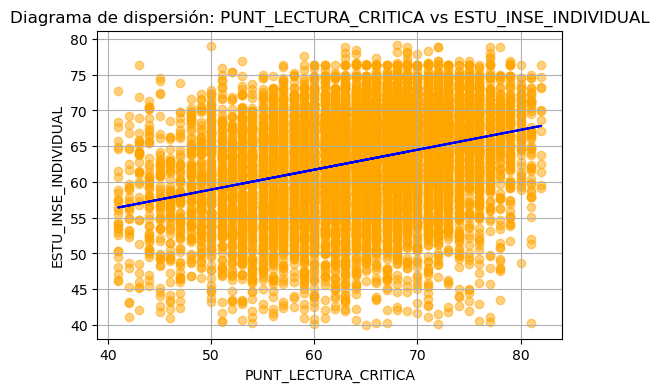

Resultados para PUNT_MATEMATICAS:
                             OLS Regression Results                             
Dep. Variable:     ESTU_INSE_INDIVIDUAL   R-squared:                       0.296
Model:                              OLS   Adj. R-squared:                  0.296
Method:                   Least Squares   F-statistic:                     4455.
Date:                  Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                          09:49:13   Log-Likelihood:                -33961.
No. Observations:                 10596   AIC:                         6.793e+04
Df Residuals:                     10594   BIC:                         6.794e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

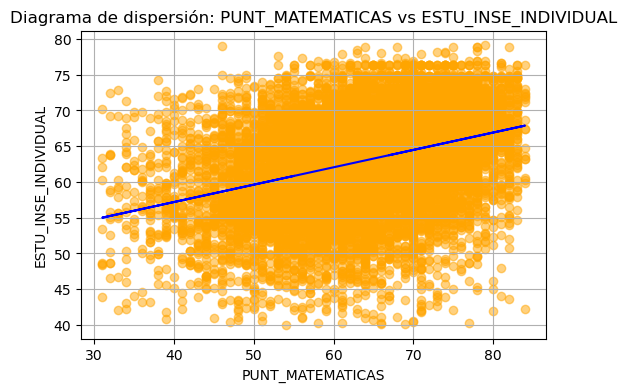

Resultados para PUNT_C_NATURALES:
                             OLS Regression Results                             
Dep. Variable:     ESTU_INSE_INDIVIDUAL   R-squared:                       0.296
Model:                              OLS   Adj. R-squared:                  0.296
Method:                   Least Squares   F-statistic:                     4455.
Date:                  Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                          09:49:13   Log-Likelihood:                -33961.
No. Observations:                 10596   AIC:                         6.793e+04
Df Residuals:                     10594   BIC:                         6.794e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

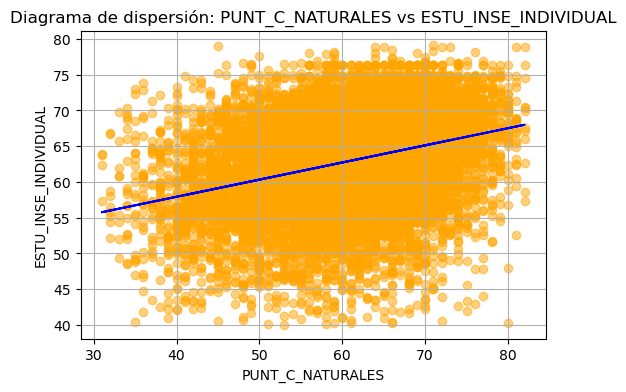

Resultados para PUNT_SOCIALES_CIUDADANAS:
                             OLS Regression Results                             
Dep. Variable:     ESTU_INSE_INDIVIDUAL   R-squared:                       0.296
Model:                              OLS   Adj. R-squared:                  0.296
Method:                   Least Squares   F-statistic:                     4455.
Date:                  Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                          09:49:13   Log-Likelihood:                -33961.
No. Observations:                 10596   AIC:                         6.793e+04
Df Residuals:                     10594   BIC:                         6.794e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

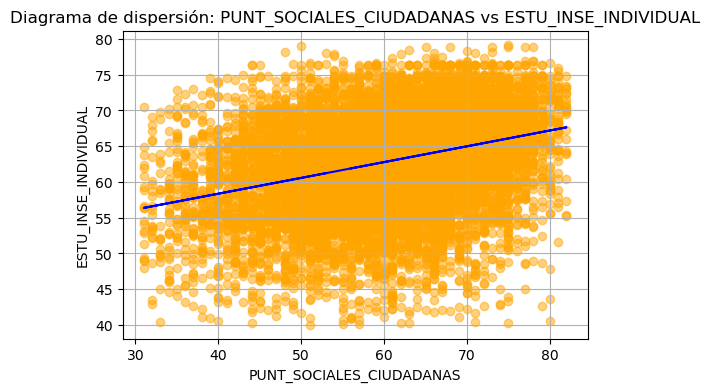

Resultados para PUNT_INGLES:
                             OLS Regression Results                             
Dep. Variable:     ESTU_INSE_INDIVIDUAL   R-squared:                       0.296
Model:                              OLS   Adj. R-squared:                  0.296
Method:                   Least Squares   F-statistic:                     4455.
Date:                  Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                          09:49:13   Log-Likelihood:                -33961.
No. Observations:                 10596   AIC:                         6.793e+04
Df Residuals:                     10594   BIC:                         6.794e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
c

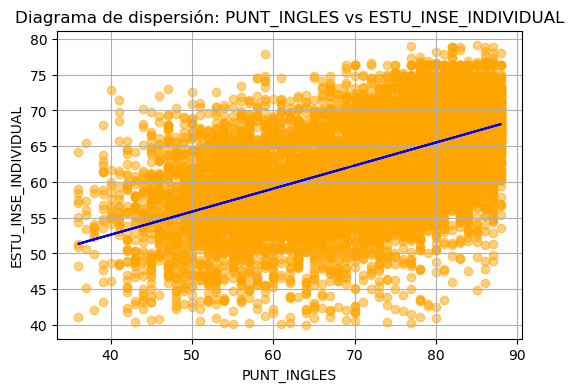

In [61]:
variables_explicativas = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 
                          'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']

for variable in variables_explicativas:
    x = np.array(datos_icfes1[variable]).reshape(-1, 1)
    y = datos_icfes1['ESTU_INSE_INDIVIDUAL']
    modelo_lineal = LinearRegression()
    regresion = modelo_lineal.fit(x, y)
    print(f'Resultados para {variable}:')
    print(modelo.summary())
    pred_lineal = regresion.predict(x)
    plt.figure(figsize=(6, 4))
    plt.scatter(datos_icfes1[variable], datos_icfes1['ESTU_INSE_INDIVIDUAL'], alpha=0.5, label='Datos', color='orange')
    
    #Línea de regresión
    plt.plot(datos_icfes1[variable], pred_lineal, color='blue', label='Línea de regresión')
    
    plt.title(f'Diagrama de dispersión: {variable} vs ESTU_INSE_INDIVIDUAL')
    plt.xlabel(variable)
    plt.ylabel('ESTU_INSE_INDIVIDUAL')
    plt.grid(True)
    
    plt.show()

## Variable respuesta PUNT_GLOBAL

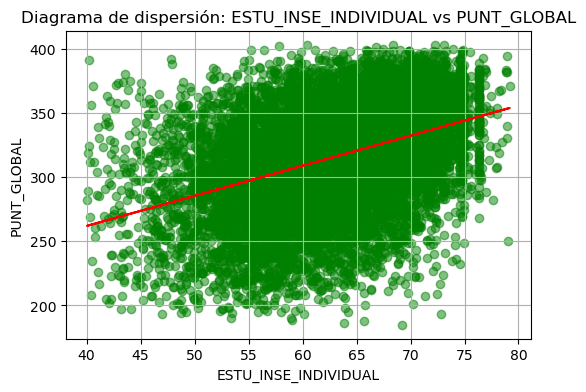

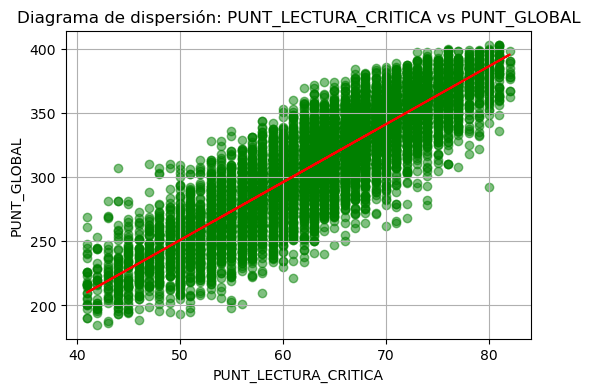

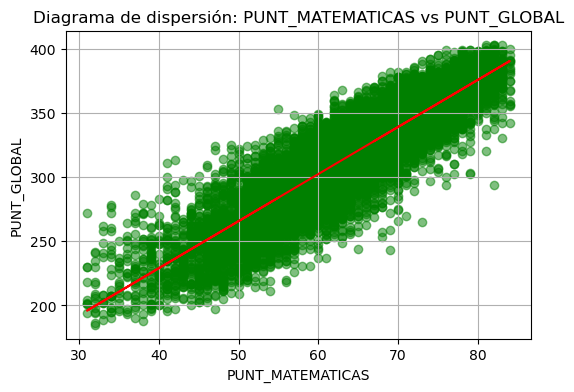

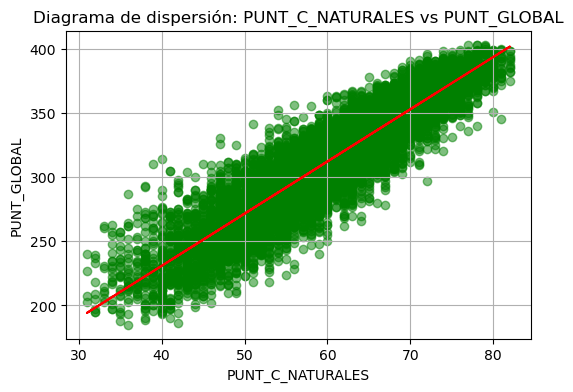

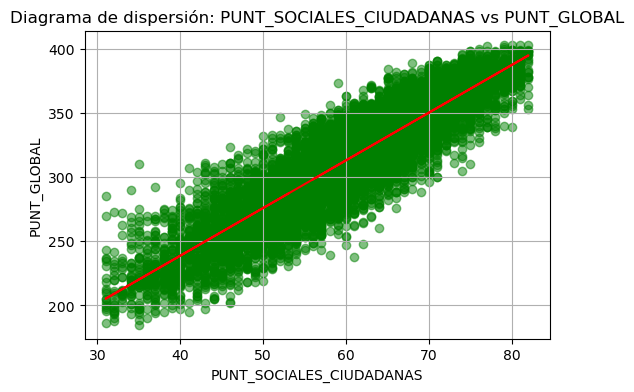

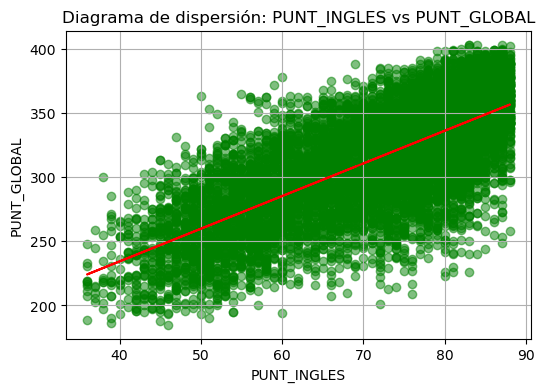

In [54]:
variables_explicativas = ['ESTU_INSE_INDIVIDUAL','PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 
                          'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']

for variable in variables_explicativas:
    x = np.array(datos_icfes1[variable]).reshape(-1, 1)
    y = datos_icfes1['PUNT_GLOBAL']
    modelo_lineal = LinearRegression()
    regresion = modelo_lineal.fit(x, y)
    
    pred_lineal = regresion.predict(x)
    plt.figure(figsize=(6, 4))
    plt.scatter(datos_icfes1[variable], datos_icfes1['PUNT_GLOBAL'], alpha=0.5, label='Datos', color='green')
    
    #Línea de regresión
    plt.plot(datos_icfes1[variable], pred_lineal, color='red', label='Línea de regresión')
    
    plt.title(f'Diagrama de dispersión: {variable} vs PUNT_GLOBAL')
    plt.xlabel(variable)
    plt.ylabel('PUNT_GLOBAL')
    plt.grid(True)
    
    plt.show()

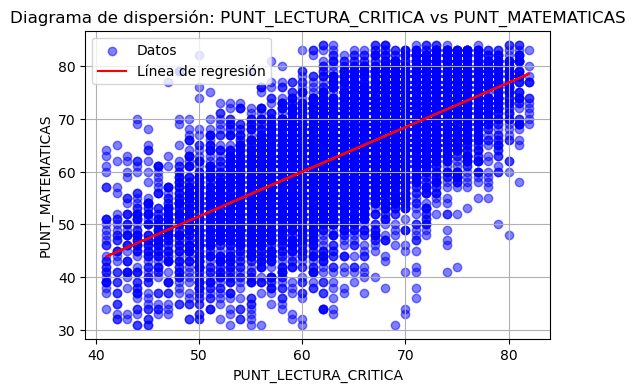

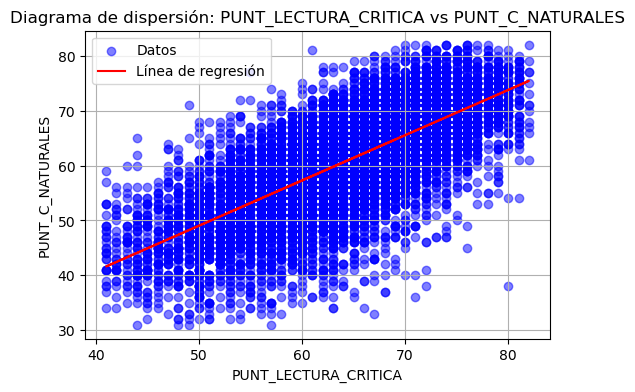

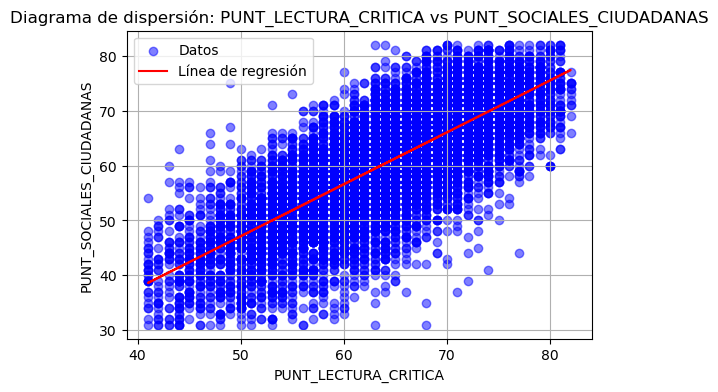

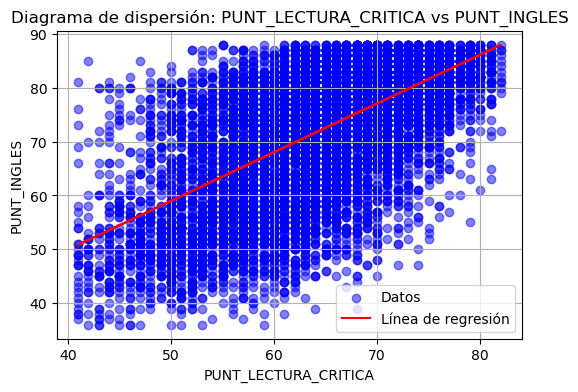

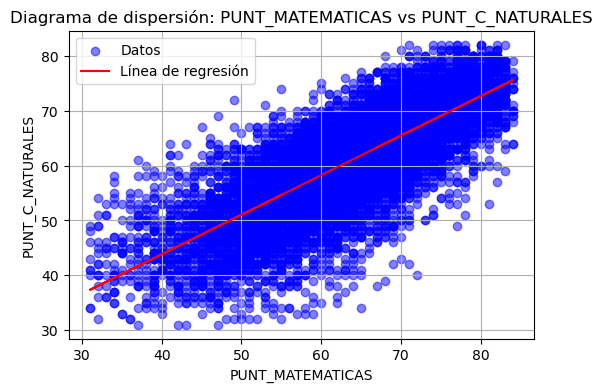

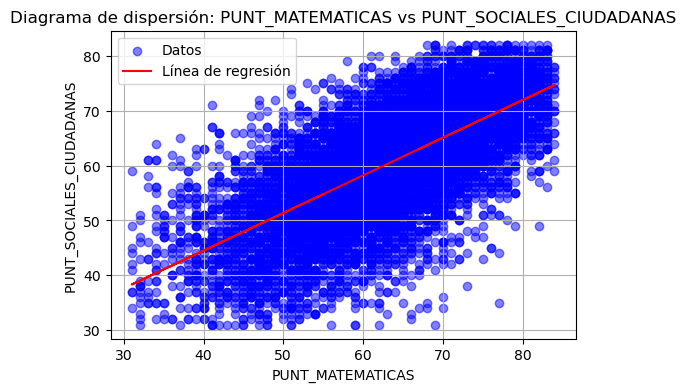

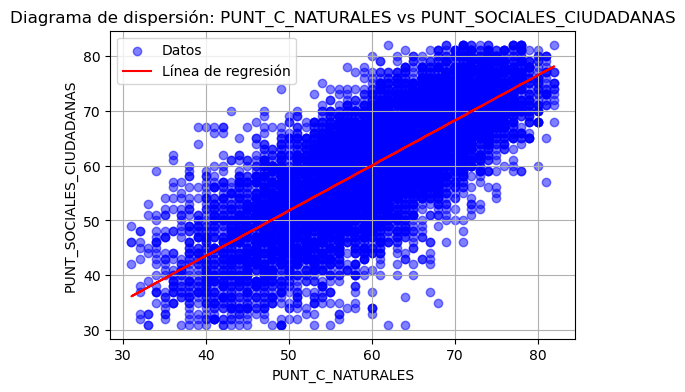

In [56]:
new_var_explicativas = [
    ('PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS'),
    ('PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES'),
    ('PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS'),
    ('PUNT_LECTURA_CRITICA', 'PUNT_INGLES'),
    ('PUNT_MATEMATICAS', 'PUNT_C_NATURALES'),
    ('PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS'),
    ('PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS'),
]

for var_x, var_y in new_var_explicativas:
    x = np.array(datos_icfes1[var_x]).reshape(-1, 1)
    y = np.array(datos_icfes1[var_y])

    modelo_lineal = LinearRegression() # Modelo de regresión lineal
    regresion = modelo_lineal.fit(x, y)
    pred_lineal = regresion.predict(x) #  Prediccion linea de regrecion
    plt.figure(figsize=(6, 4))
    plt.scatter(datos_icfes1[var_x], datos_icfes1[var_y], alpha=0.5, label='Datos', color='blue')
    plt.plot(datos_icfes1[var_x], pred_lineal, color='red', label='Línea de regresión')  # Línea de regresión

    plt.title(f'Diagrama de dispersión: {var_x} vs {var_y}')
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.grid(True)
    plt.legend()

    plt.show()


Se grafican dos conjuntos de datos: las nuevas variables explicativas seleccionadas y las variables explicativas anteriores en relación con el puntaje global. A partir de los gráficos, se observa que el puntaje global presenta una correlación positiva con la mayoría de las variables, lo que sugiere que a medida que estas variables aumentan, también lo hace el puntaje global. Sin embargo, el índice socioeconómico (ESTU_INSE_INDIVIDUAL) no muestra una correlación , lo que indica que, a diferencia de las otras variables, un mayor puntaje en este índice no necesariamente se asocia con un mayor puntaje global.

Las nuevas variables explicativas se seleccionan utilizando la matriz de correlación de Pearson, que cuantifica la relación lineal entre las variables. Posteriormente, se grafica la línea de regresión lineal dentro de los diagramas de dispersión, lo que permite visualizar la predicción que realiza el modelo sobre los datos. Este análisis no solo ayuda a identificar las variables más influyentes en el puntaje global, sino que también muestra cómo estas relaciones se ajustan a un modelo lineal, lo que permite hacer predicciones basadas en los datos observados.

# Grafica 3d

In [16]:
intercepto

43.86609014605479

In [39]:
pred_lineal

array([56.51750161, 67.30380838, 62.72645517, ..., 67.2708798 ,
       54.85146515, 61.12048084])

R² del modelo: 0.29324394518505303


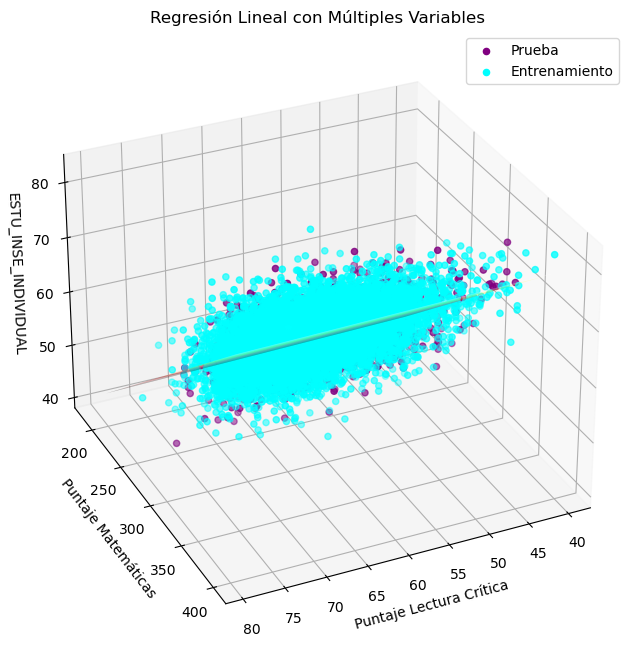

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = datos_icfes1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 
                 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']]
Y = datos_icfes1['ESTU_INSE_INDIVIDUAL']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0)
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion.predict(testX)
r2_lineal = regresion.score(testX, testY)
print(f"R² del modelo: {r2_lineal}")


XY = datos_icfes1[['ESTU_INSE_INDIVIDUAL', 'PUNT_GLOBAL']]
Z = datos_icfes1['PUNT_LECTURA_CRITICA']
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size=0.2, random_state=0)
modelo1 = LinearRegression()
regresion1 = modelo1.fit(trainXY, trainZ)
coef = modelo1.coef_
intercepto = modelo1.intercept_


xx, yy = np.meshgrid(np.linspace(trainXY['ESTU_INSE_INDIVIDUAL'].min(), trainXY['ESTU_INSE_INDIVIDUAL'].max(), num=10), 
                     np.linspace(trainXY['PUNT_GLOBAL'].min(), trainXY['PUNT_GLOBAL'].max(), num=10))
plano_reg = coef[0]*xx + coef[1]*yy + intercepto
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, plano_reg, alpha=0.3, cmap='hot')
ax.scatter(testXY['ESTU_INSE_INDIVIDUAL'], testXY['PUNT_GLOBAL'], testZ, c='purple', s=20, label='Prueba')
ax.scatter(trainXY['ESTU_INSE_INDIVIDUAL'], trainXY['PUNT_GLOBAL'], trainZ, c='aqua', s=20, label='Entrenamiento')

ax.view_init(elev=30., azim=65)
ax.set_xlabel('Puntaje Lectura Crítica')
ax.set_ylabel('Puntaje Matemáticas')
ax.set_zlabel('ESTU_INSE_INDIVIDUAL')
ax.set_title('Regresión Lineal con Múltiples Variables')
ax.legend()

plt.show()

# Red neuronal

In [76]:
!pip install scikit-learn  
from sklearn.neural_network import MLPRegressor # Import the MLPRegressor class

red_neuronal = MLPRegressor(hidden_layer_sizes=(10,10,10,10, 10, 10,10,10,10,10,10),
                   max_iter = 500, activation = 'relu', solver = 'adam', learning_rate = 'invscaling')
red.fit(trainX,trainY)

MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10),
             learning_rate='invscaling', max_iter=500)

In [78]:
red_neuronal.fit(trainX, trainY)

red_neuronal.score(testX, testY)

0.2824898232534345

In [74]:
X.head(4)

PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  PUNT_C_NATURALES  \
4                    53                55                41   
5                    63                38                60   
7                    57                68                74   
8                    60                70                69   

   PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  
4                        56         69.0          263  
5                        59         45.0          271  
7                        61         52.0          320  
8                        63         73.0          330

El modelo es un MLPRegressor (Multilayer Perceptron) configurado con varias capas ocultas, cada una con 10 neuronas. Este tipo de red se utiliza para tareas de regresión, es decir, para predecir valores continuos.

La evaluación del rendimiento del modelo arroja un coeficiente de determinación de 0.2824, lo que indica que la red neuronal es discreta con los datos de prueba. Este valor sugiere que el modelo no ajusta completamente los datos y que hay espacio para mejorar.